           Date  Capacity    Turnover    Open    High     Low   Close  Change  \
0    2010-01-04  20083125  1132155005   56.45   56.65   56.05   56.50    0.05   
1    2010-01-05  16453854   932015376   56.80   56.90   56.15   56.50    0.00   
2    2010-01-06  19012172  1087143829   56.50   57.75   56.50   57.55    1.05   
3    2010-01-07  14110575   814344344   57.60   58.15   57.30   57.40   -0.15   
4    2010-01-08  11342752   651830965   57.30   57.75   57.05   57.75    0.35   
...         ...       ...         ...     ...     ...     ...     ...     ...   
3408 2024-01-15  12566534  1673280222  133.30  133.55  132.65  133.00    0.35   
3409 2024-01-16  23016099  3029504121  132.05  132.30  131.10  131.65   -1.35   
3410 2024-01-17  39219163  5016755779  130.00  130.00  127.30  127.45    0.00   
3411 2024-01-18   7535303   965672293  127.90  128.55  127.90  128.30    0.85   
3412 2024-01-19  26897126  3553992205  131.70  133.10  131.10  132.90    4.60   

      Transcation  
0      

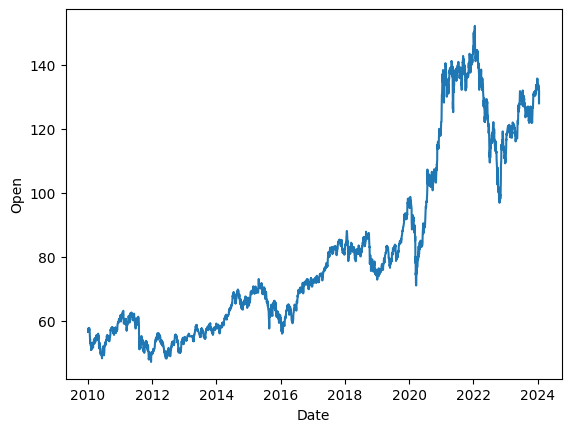

In [52]:
import twstock
import pandas as pd
# 導入twstock及pandas模組，pandas模組縮寫為pd

target_stock = '0050'  #股票代號變數
stock = twstock.Stock(target_stock)  #告訴twstock我們要查詢的股票
target_price = stock.fetch_from(2005, 5)  #取用2020/05至今每天的交易資料

name_attribute = [
    'Date', 'Capacity', 'Turnover', 'Open', 'High', 'Low', 'Close', 'Change',
    'Transcation'
]  #幫收集到的資料設定表頭

df = pd.DataFrame(columns=name_attribute, data=target_price)
#將twstock抓到的清單轉成Data Frame格式的資料表
print(df)

import matplotlib.pyplot as plt
plt.plot(df['Date'], df['Open'])
plt.xlabel('Date')
plt.ylabel('Open')
plt.show()




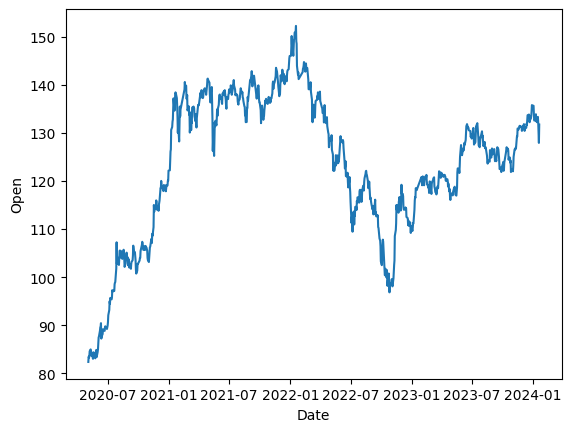

In [51]:
import matplotlib.pyplot as plt
plt.plot(df['Date'], df['Open'])
plt.xlabel('Date')
plt.ylabel('Open')
plt.show()

In [42]:
from datetime import datetime
#國歷轉西元
def taiwan_to_ad(date_str):
    date_str = date_str.replace('年','-')
    date_str = date_str.replace('月','-')
    date_str = date_str.replace('日','')

    sp = date_str.split('-')
    result  = str(int(sp[0])+1911) + '-' + sp[1] + '-' + sp[2]
    return result

# 舉例：轉換 '94年01月11日' 為 'xxxx-xx-xx' 格式
taiwan_date_str = '94年01月11日'
formatted_date = taiwan_to_ad(taiwan_date_str)
print(f"台灣國歷 {taiwan_date_str} 對應的西元日期為 {formatted_date}")

台灣國歷 94年01月11日 對應的西元日期為 2005-01-11


In [47]:
def get_twse_dividend_history(start_date: str, end_date: str):
    url = f"https://www.twse.com.tw/exchangeReport/TWT49U?response=html&strDate={start_date}&endDate={end_date}"
    dividend_history = pd.read_html(url)

    return dividend_history[0]

data = get_twse_dividend_history("20050101","20231231")
print(data.keys)

df = pd.DataFrame(columns=['資料日期','股票代號','除權息前收盤價','除權息參考價','權值+息值','權/息','減除股利參考價'], data=data)
df = df[df['股票代號'] == '0050']
df['資料日期'] = df['資料日期'].apply(taiwan_to_ad)
df

<bound method NDFrame.keys of              資料日期   股票代號     股票名稱  除權息前收盤價  除權息參考價     權值+息值 權/息    漲停價格  \
0       94年01月11日   6280       崇貿    33.00   27.48  5.520000   權   29.40   
1       94年01月18日   2023       燁輝    23.30   23.19  0.110000   權   24.90   
2       94年01月24日   2888      新光金    31.00   30.54  0.460000   權   33.10   
3       94年01月25日   2825      中央保    11.80   11.13  0.670000   權   11.90   
4       94年02月14日   2388       威盛    16.00   15.22  0.780000   權   16.20   
...           ...    ...      ...      ...     ...       ...  ..     ...   
14125  112年12月21日  00921  兆豐龍頭等權重    18.17   17.97  0.200000   息   19.76   
14126  112年12月21日   2753     八方雲集   171.00  169.00  1.995488   息  185.50   
14127  112年12月21日   8070      長華*    34.30   33.75  0.540420   息   37.10   
14128  112年12月26日   2028       威致    27.45   26.94  0.500492   息   29.60   
14129  112年12月26日   4912  聯德控股-KY    81.40   80.57  0.828000   息   88.60   

         跌停價格  開盤競價基準  減除股利參考價   詳細資料 最近一次申報資料 季別/日期  最近一

,資料日期,股票代號,除權息前收盤價,除權息參考價,權值+息值,權/息,減除股利參考價
21,2005-05-19,0050,46.69,44.84,1.85,息,44.84
1068,2006-10-26,0050,57.40,53.40,4.00,息,53.40
1604,2007-10-24,0050,70.60,68.10,2.50,息,68.10
2219,2008-10-24,0050,35.51,33.51,2.00,息,33.51
2712,2009-10-23,0050,53.70,52.70,1.00,息,52.70
3340,2010-10-25,0050,57.10,54.90,2.20,息,54.90
4068,2011-10-26,0050,53.60,51.65,1.95,息,51.65
4738,2012-10-24,0050,52.90,51.05,1.85,息,51.05
5424,2013-10-24,0050,58.70,57.35,1.35,息,57.35
6168,2014-10-24,0050,65.05,63.50,1.55,息,63.50


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36039 (\N{CJK UNIFIED IDEOGRAPH-8CC7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26009 (\N{CJK UNIFIED IDEOGRAPH-6599}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38500 (\

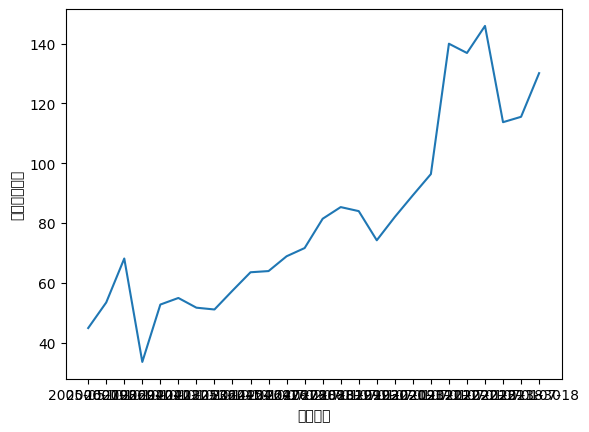

In [48]:
import matplotlib.pyplot as plt
plt.plot(df['資料日期'], df['除權息參考價'])
plt.xlabel('資料日期')
plt.ylabel('除權息參考價')
plt.show()

台灣國歷 94年01月11日 對應的西元日期為 2005-01-11
